# Herrar 3 Öst


## Prepare the data

Load all of the tables into a list of dataframes


In [2]:
import pandas as pd
from pathlib import Path

In [6]:
folder_path = Path("./data/tabular_data")
dataframes = [pd.read_csv(csv) for csv in folder_path.glob("*.csv")]

for df in dataframes:
    df.insert(
        2,
        "Seconds",
        df["Tid"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1])),
    )
    goals = df[df["Mål"].notna()]["Mål"].str.split("-", expand=True).astype("Int64")
    df.insert(4, "HomeGoals", goals[0])
    df.insert(5, "AwayGoals", goals[1])
dataframes[0].head()

,match_id,Tid,Seconds,Mål,HomeGoals,AwayGoals,Lag,Händelse,Nr,Spelare
0,32372450,1:50,110,1-1,1,1,Årsta AIK HF,Mål,15,Noak Piléus
1,32372450,3:49,229,1-2,1,2,Årsta AIK HF,Mål,27,Casper Siltala
2,32372450,5:01,301,1-3,1,3,Årsta AIK HF,Mål,7,Johan Michélsen
3,32372450,5:37,337,2-3,2,3,Hellas HK,Mål,17,Sigvard Arvidsson
4,32372450,5:47,347,3-3,3,3,Hellas HK,Mål,19,Sixten Nyhlen


Make one central dataframe with all tables concatted


In [7]:
combined_df = pd.concat(dataframes, ignore_index=True, sort=False)
combined_df.head()

,match_id,Tid,Seconds,Mål,HomeGoals,AwayGoals,Lag,Händelse,Nr,Spelare
0,32372450,1:50,110,1-1,1,1,Årsta AIK HF,Mål,15,Noak Piléus
1,32372450,3:49,229,1-2,1,2,Årsta AIK HF,Mål,27,Casper Siltala
2,32372450,5:01,301,1-3,1,3,Årsta AIK HF,Mål,7,Johan Michélsen
3,32372450,5:37,337,2-3,2,3,Hellas HK,Mål,17,Sigvard Arvidsson
4,32372450,5:47,347,3-3,3,3,Hellas HK,Mål,19,Sixten Nyhlen


In [8]:
meta_info = pd.read_csv("./data/meta_info.csv")
meta_info.head()

,match_id,home_team,away_team,starter_home_team,starter_away_team
0,32372450,Hellas HK,Årsta AIK HF,"['Sixten Nyhlen', 'Melker Trobäck', 'David Jun...","['Johan Michélsen', 'Casper Siltala', 'Noak Pi..."
1,32372451,Täby Centrum HK,Sollentuna HK,"['Erik Cralsson', 'Fredrik Helander', 'Gustaf ...","['Henrik Fundin', 'Leonardo Varela', 'Filip Is..."
2,32372452,Solna HF,HF Lidingölaget,"['David Evgenijevski', 'Philipp Wirt', 'Simon ...","['Gustav Lönnqvist', 'Andreas Roger', 'Viktor ..."
3,32372453,Sannadals HK,Tyresö Handboll 2,"['Daniel Granholm', 'Jesper Persson', 'Victor ...","['Jonas Rasmusson', 'Oliver Bergkvist', 'Willi..."
4,32372454,HK Uppsala,Upsala IF,"['Viktor Baky', 'Viktor Persson', 'Filip Malam...","['Mikael Fredriksson', 'Dap De Bruijckere', 'V..."


## Top scorers

Get the top scorers


In [ ]:
top_scorers = (
    combined_df[combined_df["Händelse"].isin(["Mål", "Mål 7-m"])]
    .groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

top_scorers

,Spelare,Lag,count
109,Hugo Selenius,Sollentuna HK,79
208,Oliver Bergkvist,Tyresö Handboll 2,70
134,Johan Gusting,Upsala IF,68
58,Erik Altberg,SK Kvarnberga,65
45,Dap De Bruijckere,Upsala IF,63
...,...,...,...
130,Joel Bellander,SK Kvarnberga,1
34,Carl Dahlin,HK Uppsala,1
141,Johan cassebaum,SK Kvarnberga,1
147,Jonas Rasmusson,Tyresö Handboll 2,1


In [ ]:
duplicates = top_scorers[
    top_scorers.duplicated(subset=["Spelare"], keep=False)
].sort_values("Spelare")
duplicates

,Spelare,Lag,count
228,Patrik Johnsson,SK Kvarnberga,36
227,Patrik Johnsson,Hellas HK,11


In [ ]:
topscorers_wo_7m = (
    combined_df[combined_df["Händelse"] == "Mål"]
    .groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
topscorers_wo_7m

,Spelare,Lag,count
208,Oliver Bergkvist,Tyresö Handboll 2,70
109,Hugo Selenius,Sollentuna HK,68
58,Erik Altberg,SK Kvarnberga,65
45,Dap De Bruijckere,Upsala IF,63
134,Johan Gusting,Upsala IF,58
...,...,...,...
130,Joel Bellander,SK Kvarnberga,1
253,Tintin Björnsson,Täby Centrum HK,1
113,Isak Langell,HF Lidingölaget,1
108,Hugo Castelo Branco,Årsta AIK HF,1


## Red cards and 2mins


combined\_


In [ ]:
two_mins = combined_df[combined_df["Händelse"] == "Utvisning"]

two_mins_by_player = (
    two_mins.groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
two_mins_by_player

,Spelare,Lag,count
6,Alvin Göhlman,Täby Centrum HK,10
21,Casper Siltala,Årsta AIK HF,7
71,Johan Michélsen,Årsta AIK HF,7
26,Dap De Bruijckere,Upsala IF,6
149,William Borg,HF Lidingölaget,6
...,...,...,...
92,Malte Andersson,Täby Centrum HK,1
91,Ludwid Nyhlén,Hellas HK,1
90,Ludvig Nyhlén,Hellas HK,1
34,Emanuel Einarsson,Sannadals HK,1


In [ ]:
two_mins_by_team = (
    two_mins.groupby(["Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
two_mins_by_team

,Lag,count
7,Solna HF,36
3,Hellas HK,31
0,HF Lidingölaget,30
9,Täby Centrum HK,30
5,Sannadals HK,27
11,Årsta AIK HF,27
10,Upsala IF,25
2,Hammarby IF HF 2,23
8,Tyresö Handboll 2,23
4,SK Kvarnberga,22


In [ ]:
red_cards = combined_df[combined_df["Händelse"] == "Direkt rött kort"]
reds_by_player = (
    red_cards.groupby(["Spelare", "Lag"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
reds_by_player

,Spelare,Lag,count
0,Fredrik Olin,Tyresö Handboll 2,1
1,Jonathan Polbring,Tyresö Handboll 2,1
2,Patrik Johnsson,SK Kvarnberga,1
3,Tobias LIndberg,Hellas HK,1
4,Özgur Yilmaz,SK Kvarnberga,1


### Which team forces the most two mins?


In [ ]:
two_mins_by_enemy_team = {}

for df in dataframes:
    teams = df["Lag"].unique()
    assert len(teams) == 2
    team1, team2 = teams
    df_team1 = df[df["Lag"] == team1]
    df_team2 = df[df["Lag"] == team2]
    team1_2mins = df_team1[df_team1["Händelse"] == "Utvisning"].shape[0]
    team2_2mins = df_team2[df_team2["Händelse"] == "Utvisning"].shape[0]
    two_mins_by_enemy_team[team1] = two_mins_by_enemy_team.get(team1, 0) + team2_2mins
    two_mins_by_enemy_team[team2] = two_mins_by_enemy_team.get(team2, 0) + team1_2mins

two_mins_by_enemy_team_df = (
    pd.DataFrame.from_dict(two_mins_by_enemy_team, orient="index", columns=["count"])
    .reset_index()
    .rename(columns={"index": "Lag"})
    .sort_values("count", ascending=False)
)
two_mins_by_enemy_team_df

,Lag,count
3,Tyresö Handboll 2,33
0,Solna HF,29
1,Sollentuna HK,28
8,Upsala IF,28
9,Hammarby IF HF 2,28
5,SK Kvarnberga,26
4,Sannadals HK,25
6,Täby Centrum HK,25
11,HK Uppsala,25
7,Årsta AIK HF,24


## Arsta analysis


In [ ]:
top_scorer_arsta = top_scorers[top_scorers["Lag"] == "Årsta AIK HF"]
# red_cards_arsta = reds_by_player[reds_by_player["Lag"] == "Årsta AIK HF"]
top_scorer_arsta

,Spelare,Lag,count
186,Mathias Boese,Årsta AIK HF,57
137,Johan Michélsen,Årsta AIK HF,51
98,Gustav Bergsten,Årsta AIK HF,49
206,Noak Piléus,Årsta AIK HF,35
183,Markus Svensson Johnsson,Årsta AIK HF,31
23,Astor Wintzell,Årsta AIK HF,29
181,Malte Swedberg,Årsta AIK HF,27
164,Love Borup Olsson,Årsta AIK HF,23
37,Casper Siltala,Årsta AIK HF,20
143,John Falk,Årsta AIK HF,17


In [13]:
two_mins_arsta = two_mins_by_player[two_mins_by_player["Lag"] == "Årsta AIK HF"]
two_mins_arsta

,Spelare,Lag,count
21,Casper Siltala,Årsta AIK HF,7
71,Johan Michélsen,Årsta AIK HF,7
97,Mathias Boese,Årsta AIK HF,3
84,Love Borup Olsson,Årsta AIK HF,2
13,Astor Wintzell,Årsta AIK HF,2
18,Axel Rönnberg,Årsta AIK HF,1
140,Vidar Ekeroth Mårtensson,Årsta AIK HF,1
85,Luca Fynn Eckelmann,Årsta AIK HF,1
52,Gustav Bergsten,Årsta AIK HF,1
109,Noak Piléus,Årsta AIK HF,1


### When do we score our goals ?


In [ ]:
# Get all matches where arsta played
meta_arsta = pd.concat(
    [
        meta_info[meta_info["away_team"] == "Årsta AIK HF"],
        meta_info[meta_info["home_team"] == "Årsta AIK HF"],
    ]
)
meta_arsta

,match_id,home_team,away_team,starter_home_team,starter_away_team
7,32372450,Hellas HK,Årsta AIK HF,"['Sixten Nyhlen', 'Melker Trobäck', 'David Jun...","['Johan Michélsen', 'Casper Siltala', 'Noak Pi..."
16,32372490,HF Lidingölaget,Årsta AIK HF,"['Daniel Norrby', 'William Borg', 'Ludvig Mask...","['Kristoffer Karlsson', 'Noak Piléus', 'Johan ..."
21,32372477,Solna HF,Årsta AIK HF,"['Axel Ulvselius', 'Axel Hjalmarson', 'Simon L...","['Noak Piléus', 'Malte Swedberg', 'Kristoffer ..."
32,32372510,Upsala IF,Årsta AIK HF,"['Mikael Fredriksson', 'Linus Henriksson', 'Jo...","['Kristoffer Karlsson', 'Tobias Rosengren', 'M..."
45,32372462,Tyresö Handboll 2,Årsta AIK HF,"['Niklas Lindberg', 'William Attebrant', 'Gust...","['Kristoffer Karlsson', 'Tobias Rosengren', 'A..."
65,32372501,Sollentuna HK,Årsta AIK HF,"['Eddie Pernikliski', 'Filip Isaksson', 'Gusta...","['Tobias Rosengren', 'Noak Piléus', 'Johan Mic..."
1,32372470,Årsta AIK HF,Sannadals HK,"['Noak Piléus', 'Gustav Bergsten', 'Markus Sve...","['Karl Lundqvist Karlsson', 'Joakim Bärleving-..."
5,32372495,Årsta AIK HF,HK Uppsala,"['Tobias Rosengren', 'Malte Swedberg', 'Casper...","['Simon Holm', 'Einar Sandström', 'Axel Åkerud..."
9,32372508,Årsta AIK HF,Hammarby IF HF 2,"['Kristoffer Karlsson', 'Gustav Bergsten', 'Jo...","['Andreas Eklöw', 'Pontus Ketels', 'Hampus Fri..."
18,32372460,Årsta AIK HF,SK Kvarnberga,"['Tobias Rosengren', 'Gustav Bergsten', 'Noak ...","['Nicklas Andreasson', 'Fredrik Andreasson', '..."


In [ ]:
# get the goals closest to the end of a 5 min interval for each dataframe
stats_per_bin = pd.DataFrame()

for df in dataframes:
    if df["match_id"].iloc[0] not in list(meta_arsta["match_id"]):
        continue

    copy = df.copy()
    copy["TimeBin"] = (copy["Seconds"] // 300 + 1) * 5

    # get the plus minus at the end of the bin
    stats_last_bin = copy.groupby("TimeBin", as_index=False).last()[
        ["match_id", "Mål", "TimeBin", "HomeGoals", "AwayGoals"]
    ]

    # Determine if Årsta is away or home
    meta = meta_info[meta_info["match_id"] == df["match_id"].iloc[0]]
    arsta_is_away = meta.iloc[0]["away_team"] == "Årsta AIK HF"

    # Take the differfence
    diff_home_goals = (
        stats_last_bin["HomeGoals"] - stats_last_bin["HomeGoals"].shift(1)
    ).fillna(stats_last_bin["HomeGoals"])
    diff_away_goals = (
        stats_last_bin["AwayGoals"] - stats_last_bin["AwayGoals"].shift(1)
    ).fillna(stats_last_bin["AwayGoals"])

    # depending on if it was a home game or away game adapt Goals received and made
    if arsta_is_away:
        # correctly assign the goals made and received to arsta
        stats_last_bin["GoalsReceived"] = diff_home_goals
        stats_last_bin["GoalsMade"] = diff_away_goals

        # add enemy team
        stats_last_bin.insert(
            1, "EnemyTeam", [meta.iloc[0]["home_team"]] * stats_last_bin.shape[0]
        )

    # home game
    else:
        # same but flipped
        stats_last_bin["GoalsReceived"] = diff_away_goals
        stats_last_bin["GoalsMade"] = diff_home_goals
        stats_last_bin.insert(
            1, "EnemyTeam", [meta.iloc[0]["away_team"]] * stats_last_bin.shape[0]
        )

    stats_last_bin["PlusMinus"] = (
        stats_last_bin["GoalsMade"] - stats_last_bin["GoalsReceived"]
    )

    # Delete home and away goals since no longer needed
    del stats_last_bin["HomeGoals"]
    del stats_last_bin["AwayGoals"]

    # reorder columns: move GoalsMade and GoalsReceived before PlusMinus
    cols = stats_last_bin.columns.tolist()
    # remove them first
    cols.remove("GoalsMade")
    cols.remove("GoalsReceived")
    # insert before PlusMinus
    plusminus_idx = cols.index("PlusMinus")
    cols.insert(plusminus_idx, "GoalsReceived")
    cols.insert(plusminus_idx, "GoalsMade")
    stats_last_bin = stats_last_bin[cols]

    # rename Mål to Score
    stats_last_bin.rename(columns={"Mål": "Score"}, inplace=True)

    stats_per_bin = pd.concat([stats_per_bin, stats_last_bin])

stats_per_bin

,match_id,EnemyTeam,Score,TimeBin,GoalsMade,GoalsReceived,PlusMinus
0,32372501,Sollentuna HK,3-1,5,1,3,-2
1,32372501,Sollentuna HK,4-5,10,4,1,3
2,32372501,Sollentuna HK,5-10,15,5,1,4
3,32372501,Sollentuna HK,6-13,20,3,1,2
4,32372501,Sollentuna HK,8-16,25,3,2,1
...,...,...,...,...,...,...,...
7,32372495,HK Uppsala,22-18,40,3,3,0
8,32372495,HK Uppsala,23-21,45,1,3,-2
9,32372495,HK Uppsala,25-23,50,2,2,0
10,32372495,HK Uppsala,27-26,55,2,3,-1


In [ ]:
stats_per_bin_agg = (
    stats_per_bin.groupby("TimeBin")
    .agg({"PlusMinus": "mean", "GoalsMade": "sum", "GoalsReceived": "sum"})
    .reset_index()
)
stats_per_bin_agg

,TimeBin,PlusMinus,GoalsMade,GoalsReceived
0,5,0.666667,29,21
1,10,0.75,39,30
2,15,1.083333,36,23
3,20,0.5,32,26
4,25,0.416667,34,29
5,30,0.75,33,24
6,35,0.75,33,24
7,40,0.583333,35,28
8,45,0.75,37,28
9,50,0.5,29,23


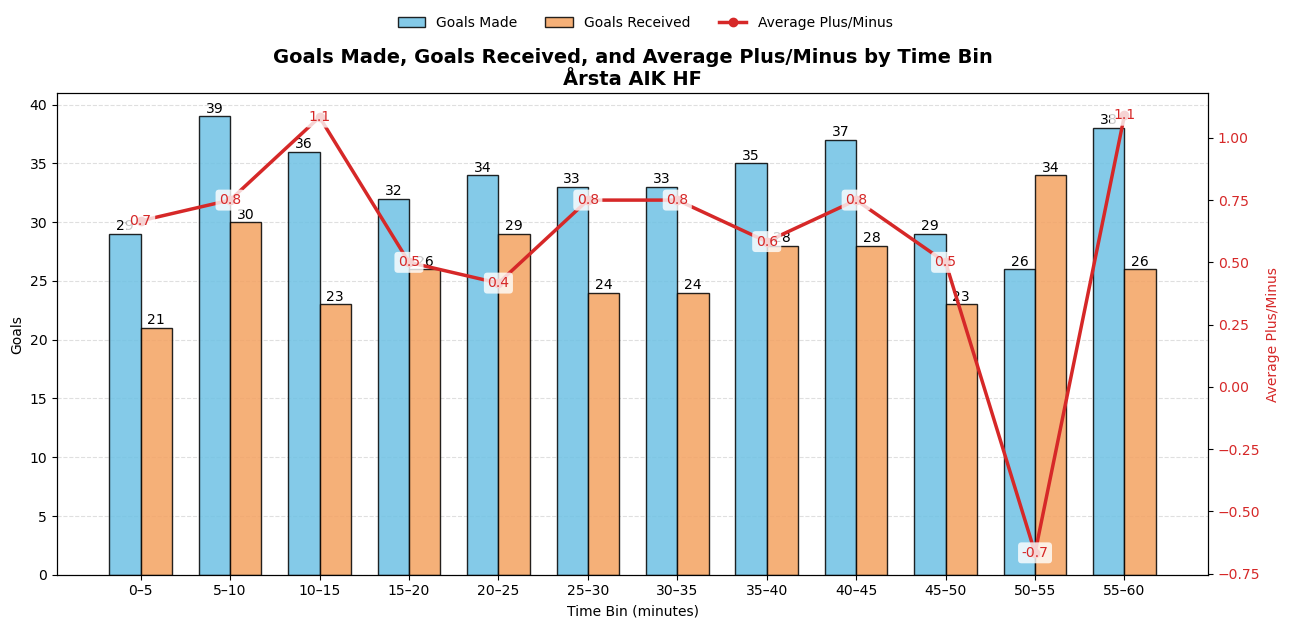

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare categorical x positions ---
bins = stats_per_bin_agg["TimeBin"].values
labels = [f"{int(t-5)}–{int(t)}" for t in bins]
x = np.arange(len(bins))

bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(13, 6))

# --- Bars ---
bars1 = ax1.bar(
    x - bar_width / 2,
    stats_per_bin_agg["GoalsMade"],
    width=bar_width,
    label="Goals Made",
    color="#6EC1E4",
    edgecolor="black",
    alpha=0.85,
    zorder=2,
)

bars2 = ax1.bar(
    x + bar_width / 2,
    stats_per_bin_agg["GoalsReceived"],
    width=bar_width,
    label="Goals Received",
    color="#F4A261",
    edgecolor="black",
    alpha=0.85,
    zorder=2,
)

# --- Bar annotations ---
for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            h + 0.05,
            f"{int(h)}",
            ha="center",
            va="bottom",
            fontsize=10,
            zorder=3,
        )

ax1.set_xlabel("Time Bin (minutes)")
ax1.set_ylabel("Goals", color="black")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax1.grid(axis="y", linestyle="--", alpha=0.4, zorder=0)

# --- Line plot (secondary axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    stats_per_bin_agg["PlusMinus"],
    color="#D62828",
    marker="o",
    linewidth=2.5,
    label="Average Plus/Minus",
    zorder=4,
)

# --- Line annotations (with background to avoid overlap) ---
for xi, yi in zip(x, stats_per_bin_agg["PlusMinus"]):
    ax2.text(
        xi,
        yi,
        f"{yi:.1f}",
        ha="center",
        va="center",
        fontsize=10,
        color="#D62828",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.8),
        zorder=5,
    )

ax2.set_ylabel("Average Plus/Minus", color="#D62828")
ax2.tick_params(axis="y", labelcolor="#D62828")

# --- Title & legend ---
plt.title(
    "Goals Made, Goals Received, and Average Plus/Minus by Time Bin\nÅrsta AIK HF",
    fontsize=14,
    weight="bold",
)

fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3, frameon=False)

plt.tight_layout()
plt.show()

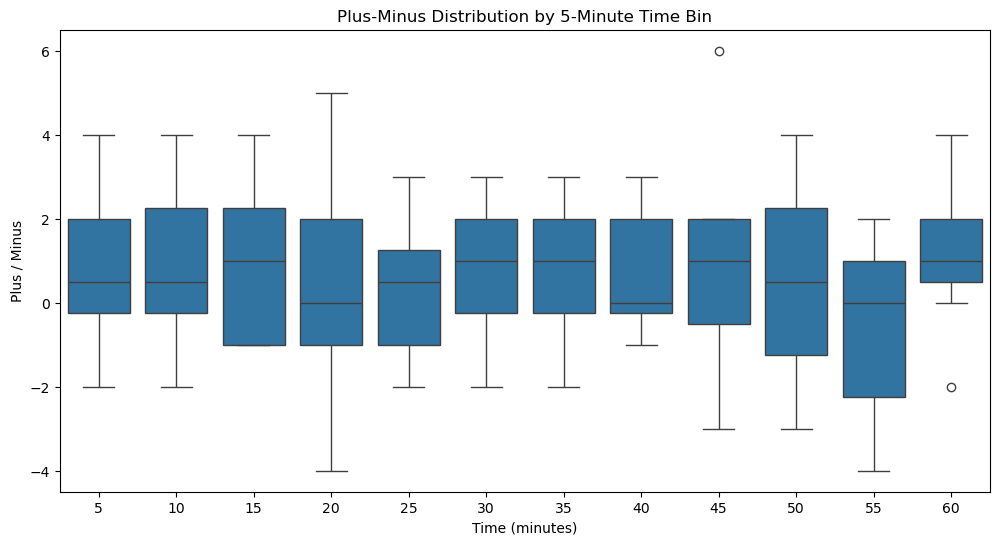

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))

stats_per_bin = stats_per_bin.reset_index(drop=True)

sns.boxplot(data=stats_per_bin, x="TimeBin", y="PlusMinus")

plt.xlabel("Time (minutes)")
plt.ylabel("Plus / Minus")
plt.title("Plus-Minus Distribution by 5-Minute Time Bin")

plt.show()

## 7m efficiency


In [ ]:
seven_min_goals = combined_df[combined_df["Händelse"].isin(["Mål 7-m", ""])]